# Hometask №1

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import random

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

To evaluate the possible quality of the original evolutionary algorithm based on the search for the maximum function for a function of dimension 100, a full grid search with averaging over 10 iterations at each step was used.
Hyperparameters of the algorithm:
* Size of the original population - [100, 200, 500]
* Mutation probability - [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
* Crossover probability - [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
* constant parameter: dimension - 100
* constant parameter: iterations - 150

Such lists of hyperparameters were chosen, because if there were more of them, the algorithm would work too long.
Data was entered in the table 'Simple_EA_scores.csv'.

## Original algorithm

Mutation operator for such algorithm:

In [17]:
# Nonuniform creep mutation
def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.2)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual,

In [18]:
old_scores = pd.read_csv('D:/ITMO/Simple_EA_scores.csv', encoding = 'utf-8')
old_scores.head(5)

,Population size,Mutation,Crossover,Scores
0,100,0.1,0.1,5.033519
1,100,0.1,0.2,4.989562
2,100,0.1,0.3,5.059116
3,100,0.1,0.5,5.440921
4,100,0.1,0.7,5.285272


3d visualization

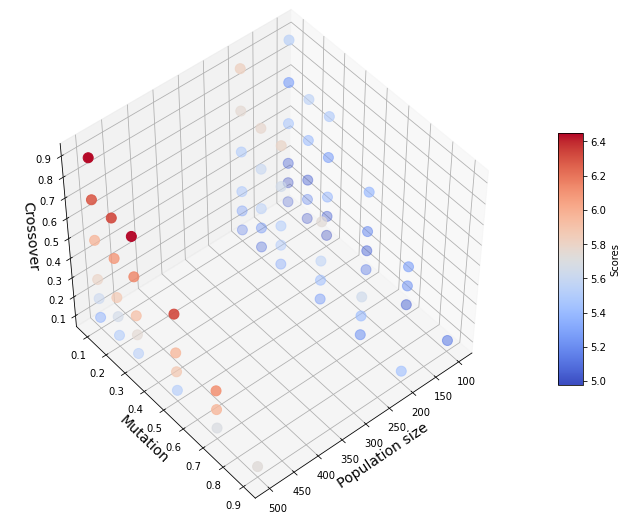

In [19]:
def grid_search_scores(dataframe, x_axis, y_axis, z_axis, colour_column):
    fig = pyplot.figure()
    ax = Axes3D(fig)

    x_vals = np.array(dataframe[x_axis])
    y_vals = np.array(dataframe[y_axis])
    z_vals = np.array(dataframe[z_axis])
    colour_data = np.array(dataframe[colour_column])

    surf = ax.scatter(x_vals, y_vals, z_vals, c=colour_data, cmap='coolwarm', s = 100)
    ax.view_init(50, 50)
    fig.colorbar(surf, shrink=0.5, aspect=10, label = colour_column)
    plt.xlabel(x_axis, fontsize = 14)
    plt.ylabel(y_axis, fontsize = 14)
    ax.set_zlabel(z_axis, fontsize = 14)
    pyplot.show()

grid_search_scores(dataframe = old_scores, x_axis = 'Population size',
                   y_axis = 'Mutation', z_axis = 'Crossover', colour_column = 'Scores')

## Modified algorithm

Mutation operator for such algorithm:

In [20]:
# Uniform mutation
def mutation(individual):
    n = len(individual)
    coord_index = random.randint(0, n-1)
    # Index of the coordinate along which we will move
    if rnd.random() < 0.85:
        individual[coord_index] += rnd.normal(0.0, 1.0)
        individual[coord_index] = np.clip(individual[coord_index], -5, 5)
    return individual,

In [21]:
new_scores = pd.read_csv('D:/ITMO/Modified_EA_scores.csv', encoding = 'utf-8')
new_scores.head(5)

,Population size,Mutation,Crossover,Scores
0,100,0.1,0.1,5.527413
1,100,0.1,0.2,5.769355
2,100,0.1,0.3,5.838599
3,100,0.1,0.5,6.064547
4,100,0.1,0.7,6.168782


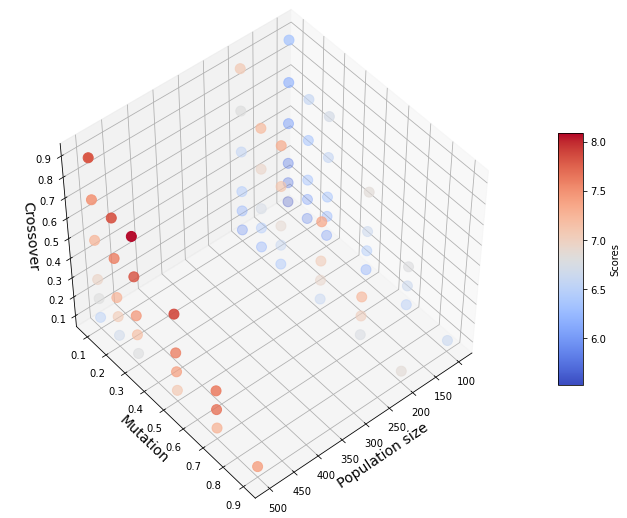

In [22]:
grid_search_scores(dataframe = new_scores, x_axis = 'Population size',
                   y_axis = 'Mutation', z_axis = 'Crossover', colour_column = 'Scores')

## Comparison of algorithms on a single run with fixed hyperparameters

* dimension = 100
* pop_size = 200
* iterations = 1000
* mutation_prob = 0.6
* crossover_prob = 0.3

Below are two graphs, where the X - axis is the iteration number, and the Y - axis is the found function value:

### The original algorithm
![Source_alg.png](https://raw.githubusercontent.com/Dreamlone/ITMO_Masters_degree/master/Images/old.png)

### Modified algorithm
![Modified.png](https://raw.githubusercontent.com/Dreamlone/ITMO_Masters_degree/master/Images/modif.png)

Thus, thanks to the modified mutation operator, it was possible to significantly increase the accuracy of the algorithm.